<a href="https://www.kaggle.com/code/arihanttanwar/model-comparison-on-boston-housing-data?scriptVersionId=104079786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **BOSTON HOUSE PRICE PREDICTION**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### Importing Boston house price dataset 
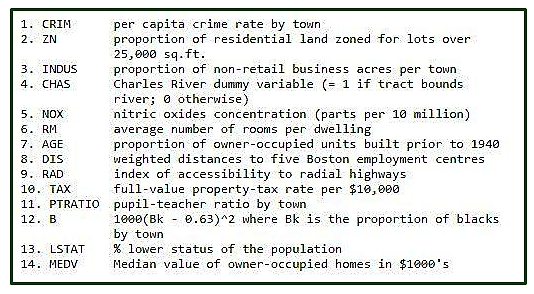

In [13]:
df = pd.read_csv('../input/the-boston-houseprice-data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df.shape

(506, 14)

### Check for missing values and unique values

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Understanding the correlation between features
#### 1. Positive correlation
#### 2. Negative correlation

In [18]:
correlation = df.corr()

<AxesSubplot:>

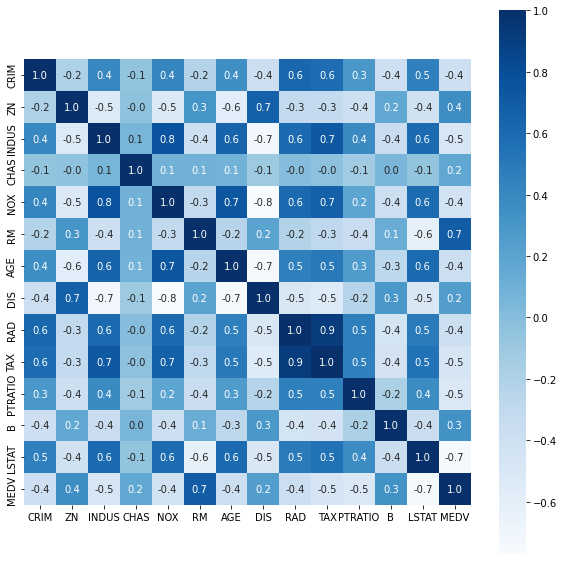

In [19]:
#creating a heatmap of the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Blues',annot=True,fmt='.1f',square=True)

### Checking the skeenwss of each variable

In [20]:
skew = df.skew().sort_values(ascending = False)
print(skew)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64


If skewness is between -0.5 to 0.5 then it is normal distribution else it is left or right depending on the data

### Checking outliers using boxplots

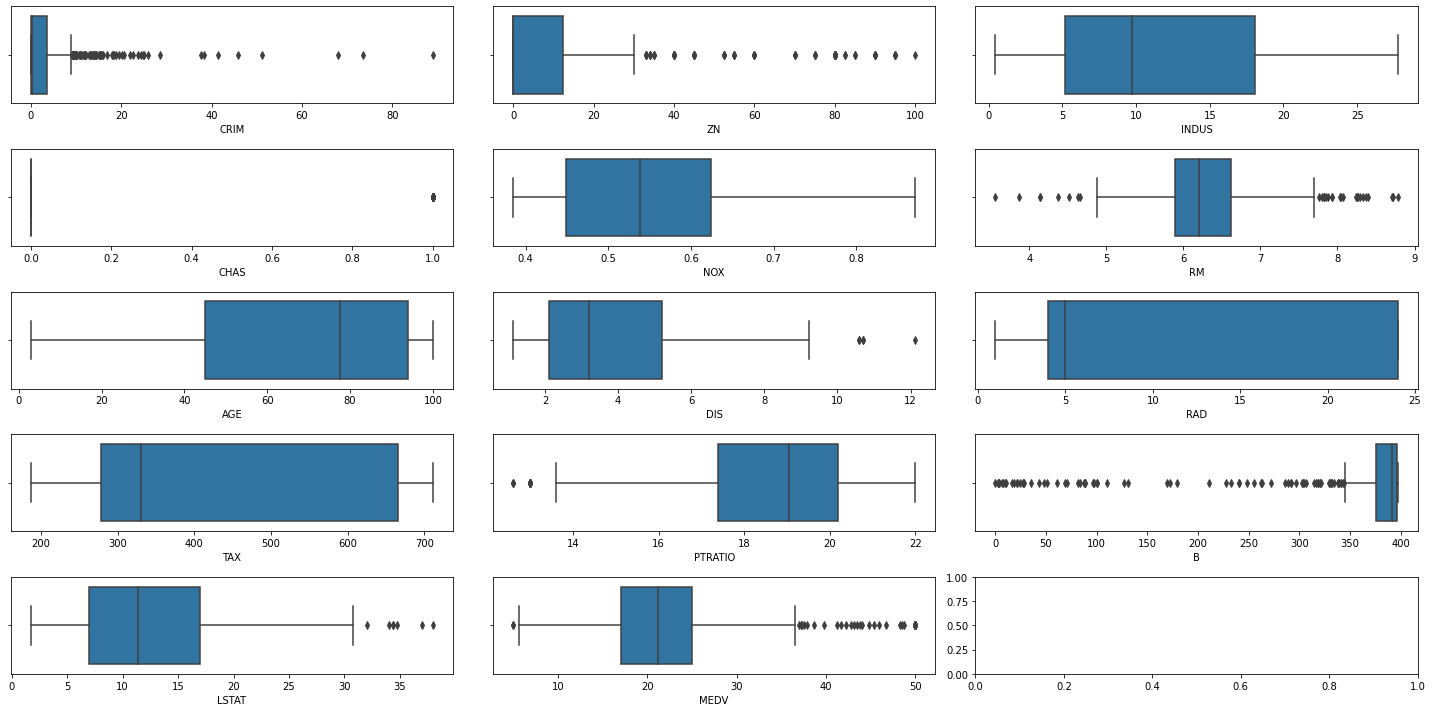

In [21]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(x=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout()

In [22]:
px.scatter (df, x = "MEDV", y = "RM", color = "CHAS", template = "plotly_dark",  trendline="ols").show()
px.scatter (df, x = "MEDV", y = "DIS", color = "ZN", template = "plotly_dark",  trendline="ols").show()
px.scatter (df, x = "MEDV", y = "AGE", color = "ZN", template = "plotly_dark",  trendline="lowess").show()
px.scatter (df, x = "MEDV", y = "DIS", color = "RAD", template = "plotly_dark",  trendline="lowess").show ()


### Normalising the dataset using min max normalizarion 

In [23]:
scaler = MinMaxScaler()
cols = ['CRIM', 'ZN', 'TAX', 'B']   #as the values in these columns are very high

df[cols]=scaler.fit_transform(df[cols])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,2.31,0,0.538,6.575,65.2,4.0900,1,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,7.07,0,0.469,6.421,78.9,4.9671,2,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,7.07,0,0.469,7.185,61.1,4.9671,2,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,2.18,0,0.458,6.998,45.8,6.0622,3,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,2.18,0,0.458,7.147,54.2,6.0622,3,0.066794,18.7,1.000000,5.33,36.2


In [24]:
#some values are between 0 and 1 and others are not too high
df.max()

CRIM         1.0000
ZN           1.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX          1.0000
PTRATIO     22.0000
B            1.0000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

### Splitting the data 

In [25]:
#setting features and target
x = df.drop(['MEDV'],axis=1)
y = df['MEDV']

In [26]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Model training 

## **XGBoost**

In [27]:
#load the model
model1 = XGBRegressor()

#train the model
model1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
#predicting values
prediction1 = model1.predict(x_test)

#Evaluating model
mean_score1 = metrics.mean_absolute_error(y_test,prediction1)
print(mean_score1)

2.2834744154238233


## **Decision tree** 

In [29]:
#load the model
model2 = DecisionTreeRegressor()

#Train the model
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
#Predict values
prediction2 = model2.predict(x_test)

#Evaluate model
mean_score2 = metrics.mean_absolute_error(y_test,prediction2)
print(mean_score2)

3.499019607843136


## **Random forest**

In [31]:
#load the model
model3 = RandomForestRegressor()

#Train the model
model3.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
#Predict values
prediction3 = model3.predict(x_test)

#Evaluate model
mean_score3 = metrics.mean_absolute_error(y_test,prediction3)
print(mean_score3)

2.2072941176470584


## **Linear Regression**

In [33]:
#load the model
model4 = LinearRegression()

#Train the model
model4.fit(x_train,y_train)

LinearRegression()

In [34]:
#Predict values
prediction4 = model4.predict(x_test)

#Evaluate model
mean_score4 = metrics.mean_absolute_error(y_test,prediction4)
print(mean_score4)

3.1130437468934273


## Comparing models

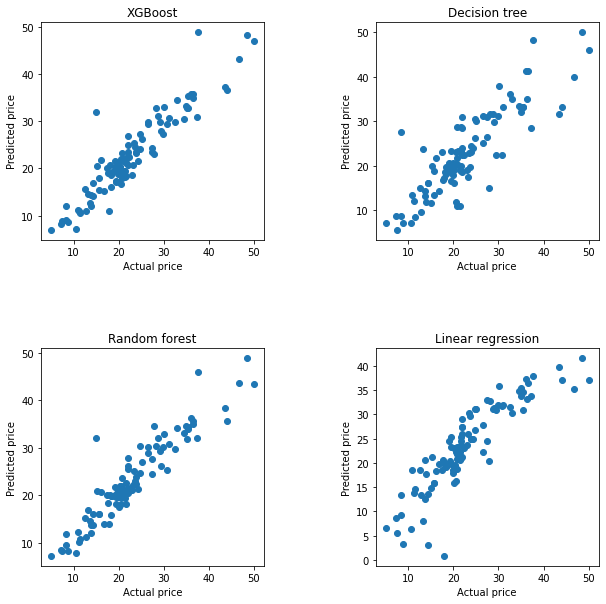

In [35]:
#visualising predicted data
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax.flatten()

ax[0][0].scatter(y_test,prediction1)
ax[0][0].set_xlabel('Actual price')
ax[0][0].set_ylabel('Predicted price')
ax[0][0].set_title('XGBoost')

ax[0][1].scatter(y_test,prediction2)
ax[0][1].set_xlabel('Actual price')
ax[0][1].set_ylabel('Predicted price')
ax[0][1].set_title('Decision tree')

ax[1][0].scatter(y_test,prediction3)
ax[1][0].set_xlabel('Actual price')
ax[1][0].set_ylabel('Predicted price')
ax[1][0].set_title('Random forest')

ax[1][1].scatter(y_test,prediction4)
ax[1][1].set_xlabel('Actual price')
ax[1][1].set_ylabel('Predicted price')
ax[1][1].set_title('Linear regression')

plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [36]:
comp = pd.DataFrame({
    'Model':['XGBoost','Deision tree','Random forest','Linear regression'],
    'Error':[mean_score1,mean_score2,mean_score3,mean_score4]
})
comp

,Model,Error
0,XGBoost,2.283474
1,Deision tree,3.499020
2,Random forest,2.207294
3,Linear regression,3.113044
